# Config

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches



In [4]:
YEAR = 2024

# Read Data

In [2]:
df = pd.read_csv('../data/Accidents in Barcelona.csv')
print(df.shape)
print(df.columns)

(52041, 27)
Index(['filenumber', 'district_name', 'neighborhood_name', 'street_name',
       'day_of_week', 'timestamp', 'shift', 'cause', 'hour', 'month', 'year',
       'uninjured', 'slight_injuries', 'serious_injuries', 'deaths',
       'people_involved', 'pedestrian_count', 'bicycle_count', 'scooter_count',
       'victims', 'superilles', 'singleplatform', 'superilles_categories',
       'singleplatform_categories', 'category', 'n_vehicles_involved', 'geom'],
      dtype='object')


# Process data


In [3]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.GeoSeries.from_wkt(df['geom']), crs="EPSG:4326"
)
gdf.head(1)

,filenumber,district_name,neighborhood_name,street_name,day_of_week,timestamp,shift,cause,hour,month,...,scooter_count,victims,superilles,singleplatform,superilles_categories,singleplatform_categories,category,n_vehicles_involved,geom,geometry
0,2018S005817,Sants-Montjuïc,la Marina del Prat Vermell,Litoral (Besòs) ...,Friday,2018-07-27 15:00:00 UTC,Afternoon,Not the cause of the pedestrian,15,7,...,0,2,False,False,False,False,Non applicable,5,POINT(2.125569 41.341339),POINT (2.12557 41.34134)


In [6]:
# get only last year 
gdf = gdf[gdf['year'] == YEAR]


# Metrics

In [7]:
gdf["year"].value_counts(dropna=False).sort_index()

year
2024    7324
Name: count, dtype: int64

# Visualize data

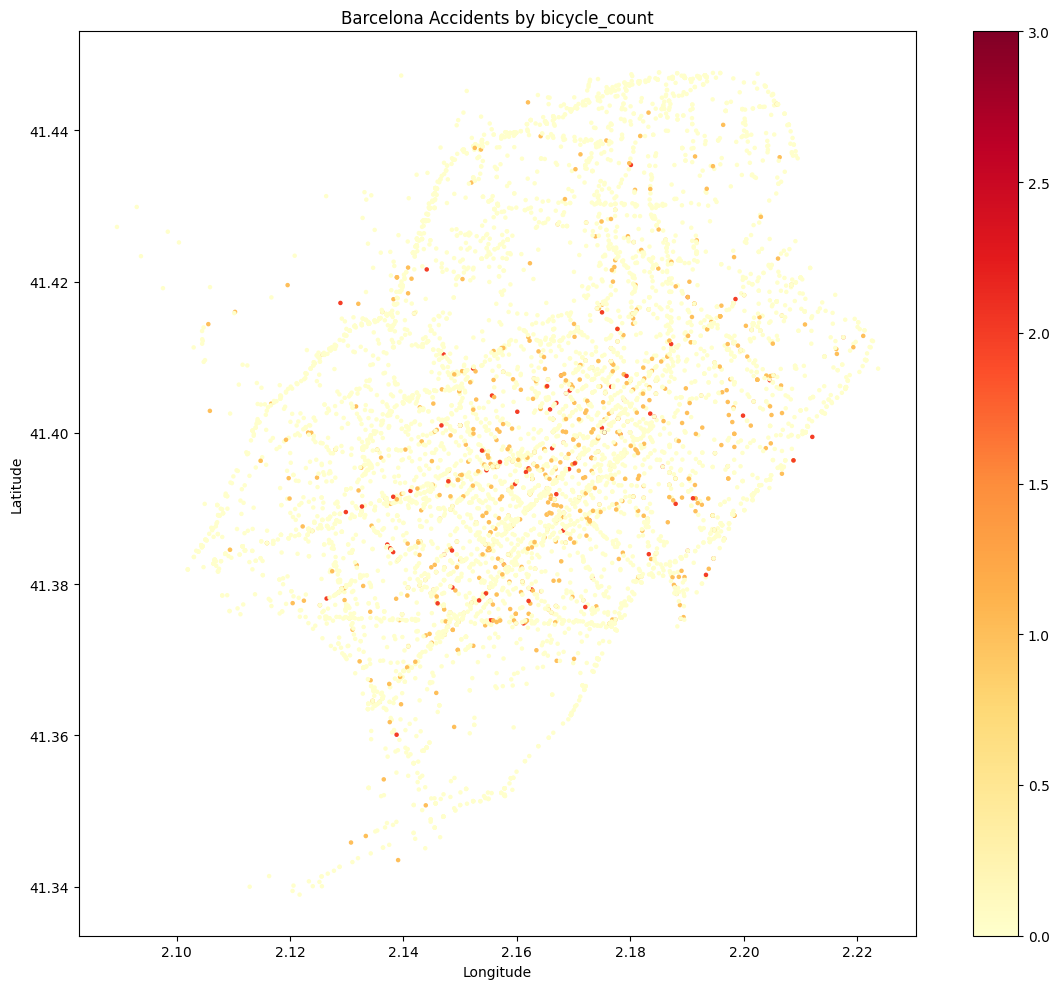

In [11]:

gdf.plot(
    column='bicycle_count',
    legend=True,
    figsize=(12, 10),
    markersize=5,
    cmap='YlOrRd'
)
plt.title('Barcelona Accidents by bicycle_count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Save data



In [14]:
gdf.to_crs(epsg=4326, inplace=True)  # Convert to WGS84 for GeoJSON compatibility
gdf["Evaluation"] = 'Accessible'
gdf.to_file(
    f"../data/accidents{YEAR}.geojson", driver='GeoJSON', index=False)


/home/lliebsch/Escritorio/REALLOCATE/REALLOCATE-BCN-pilot1/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/lliebsch/Escritorio/REALLOCATE/REALLOCATE-BCN-pilot1/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
